<a href="https://colab.research.google.com/github/GVSU-CIS635/gvsu-cis635-term-project-flood-droughtpredictions/blob/main/CIS635semesterproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
#imports
from google.colab import files
import pandas as pd
import numpy as np
import warnings
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams

uploaded = files.upload()

Saving streamflow.csv to streamflow (2).csv


In [16]:
df = pd.read_csv('streamflow.csv')
# Display the first few rows of the DataFrame
df.head()

# Get information about the dataset
df.info()

# Summary statistics
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18628 entries, 0 to 18627
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  18628 non-null  int64  
 1   Year        18628 non-null  int64  
 2   Month       18628 non-null  int64  
 3   Day         18628 non-null  int64  
 4   Date        18628 non-null  object 
 5   Q (m3/s)    18040 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 873.3+ KB


,Unnamed: 0,Year,Month,Day,Q (m3/s)
count,18628.000000,18628.00000,18628.000000,18628.000000,18040.000000
mean,21276.500000,1992.00000,6.522869,15.729815,10671.594654
std,5377.584743,14.72017,3.448812,8.800403,14275.949377
min,11963.000000,1967.00000,1.000000,1.000000,182.840000
25%,16619.750000,1979.00000,4.000000,8.000000,1419.000000
50%,21276.500000,1992.00000,7.000000,16.000000,3060.000000
75%,25933.250000,2005.00000,10.000000,23.000000,15300.000000
max,30590.000000,2017.00000,12.000000,31.000000,79059.000000


In [17]:
# Drop rows with missing values
df.dropna(inplace=True)

<Axes: >

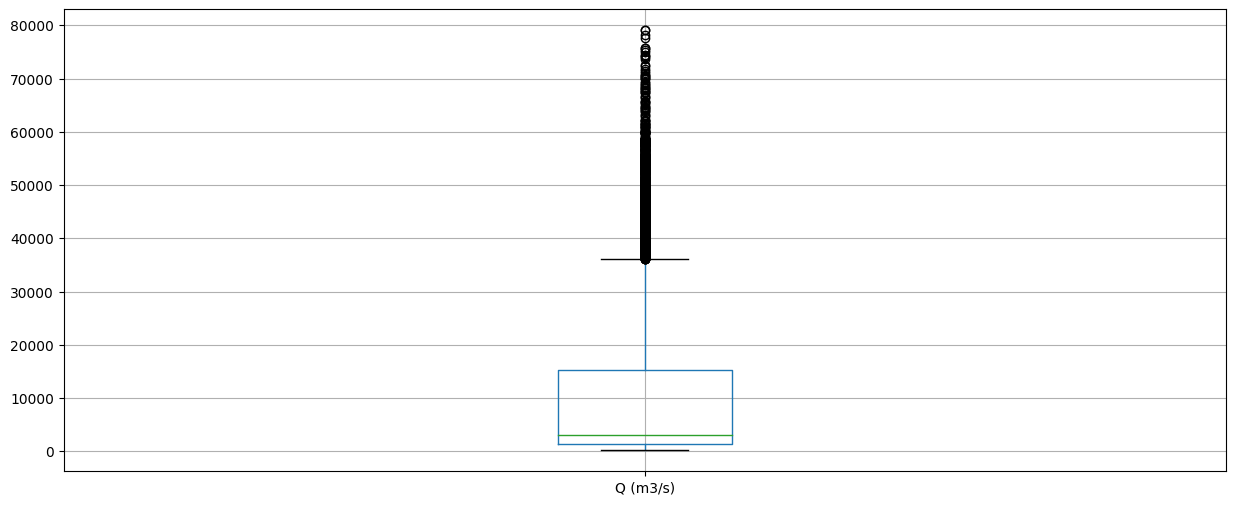

In [18]:
df.boxplot(column=['Q (m3/s)'])

<ipython-input-19-722c4fa6947f>:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.plot(df.resample('Y').mean().index.year, df.resample('Y').mean()['Q (m3/s)'], label='Average Streamflow')
<ipython-input-19-722c4fa6947f>:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.plot(df.resample('Y').mean().index.year, df.resample('Y').mean()['Q (m3/s)'], label='Average Streamflow')


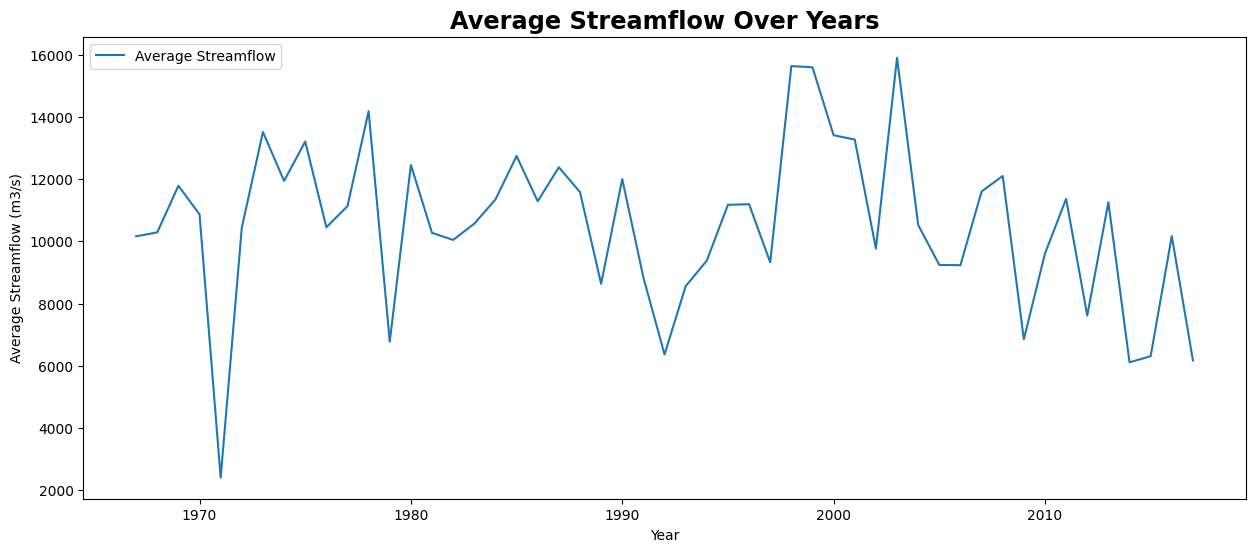

In [19]:
rcParams['figure.figsize'] = 15, 6
rcParams['axes.titlesize'] = 'xx-large'
rcParams['axes.titleweight'] = 'bold'
rcParams["legend.loc"] = 'upper left'
df['timestamp'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

# Set the timestamp column as the index
df.set_index('timestamp', inplace=True)

# Display the first few rows of your dataset
df.head()

# Visualize the streamflow data over the years
plt.plot(df.resample('Y').mean().index.year, df.resample('Y').mean()['Q (m3/s)'], label='Average Streamflow')
plt.title('Average Streamflow Over Years')
plt.xlabel('Year')
plt.ylabel('Average Streamflow (m3/s)')
plt.legend()
plt.show()

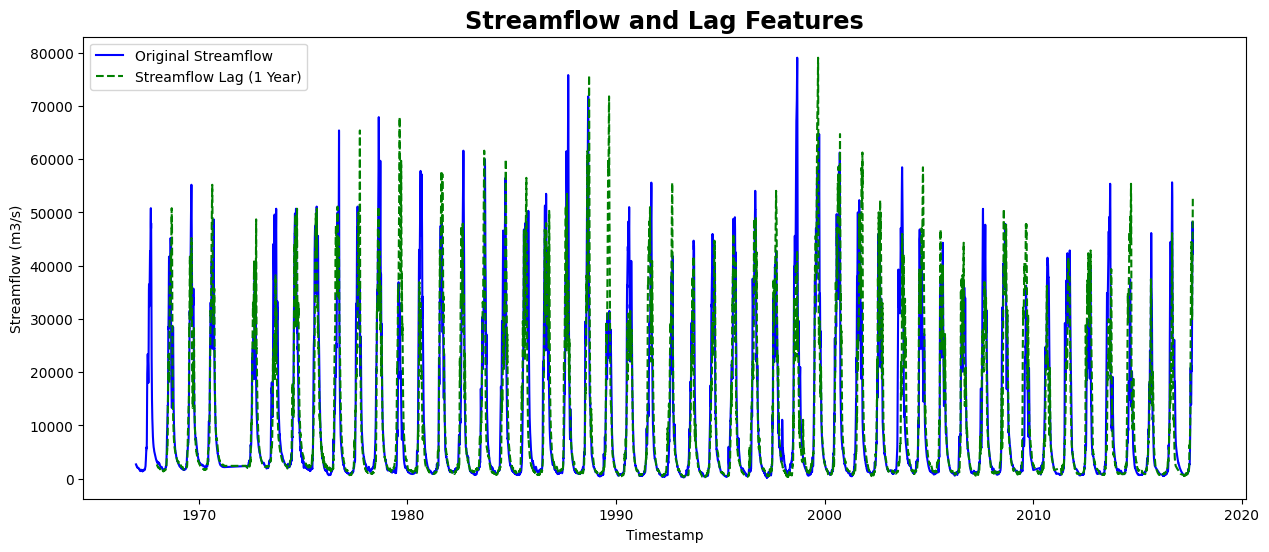

In [20]:
import matplotlib.pyplot as plt

df['streamflow_lag_year'] = df['Q (m3/s)'].shift(365)  # Assuming daily data

# Plot original streamflow and lagged versions
plt.figure(figsize=(15, 6))
plt.plot(df.index, df['Q (m3/s)'], label='Original Streamflow', color='blue')
plt.plot(df.index, df['streamflow_lag_year'], label='Streamflow Lag (1 Year)', linestyle='--', color='green')

plt.title('Streamflow and Lag Features')
plt.xlabel('Timestamp')
plt.ylabel('Streamflow (m3/s)')
plt.legend()
plt.show()




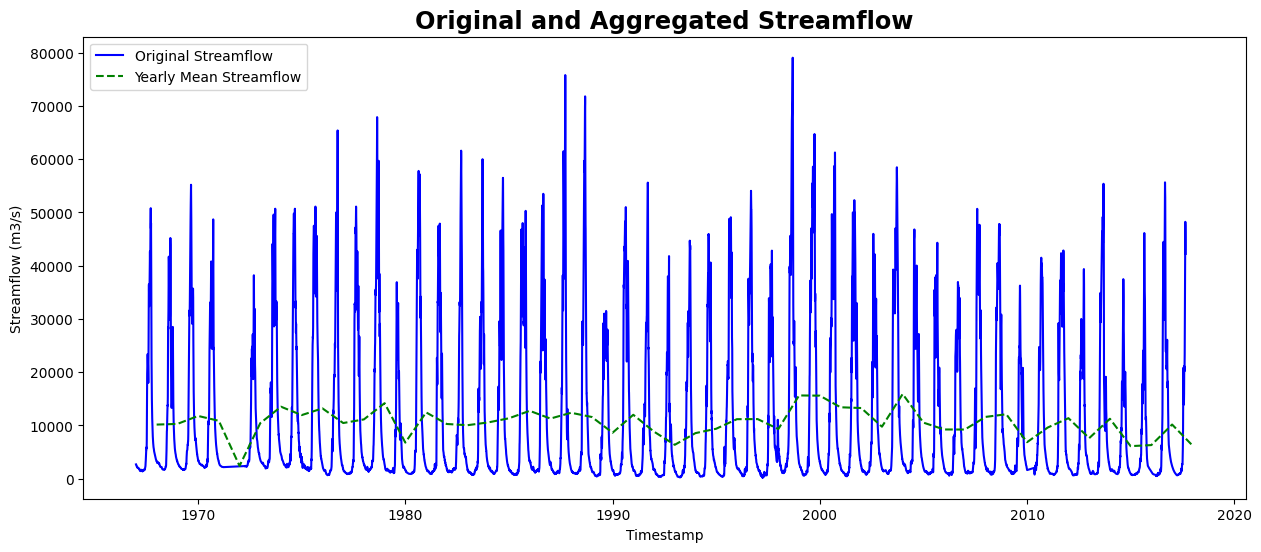

In [21]:
# Resample the data to yearly frequency and calculate the mean
df_yearly = df['Q (m3/s)'].resample('Y').mean()

# Plot the original and aggregated data
plt.figure(figsize=(15, 6))
plt.plot(df.index, df['Q (m3/s)'], label='Original Streamflow', color='blue')
plt.plot(df_yearly.index, df_yearly, label='Yearly Mean Streamflow', linestyle='--', color='green')

plt.title('Original and Aggregated Streamflow')
plt.xlabel('Timestamp')
plt.ylabel('Streamflow (m3/s)')
plt.legend()
plt.show()


In [22]:
# Install necessary libraries
!pip install pandas numpy matplotlib statsmodels

# Import libraries
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


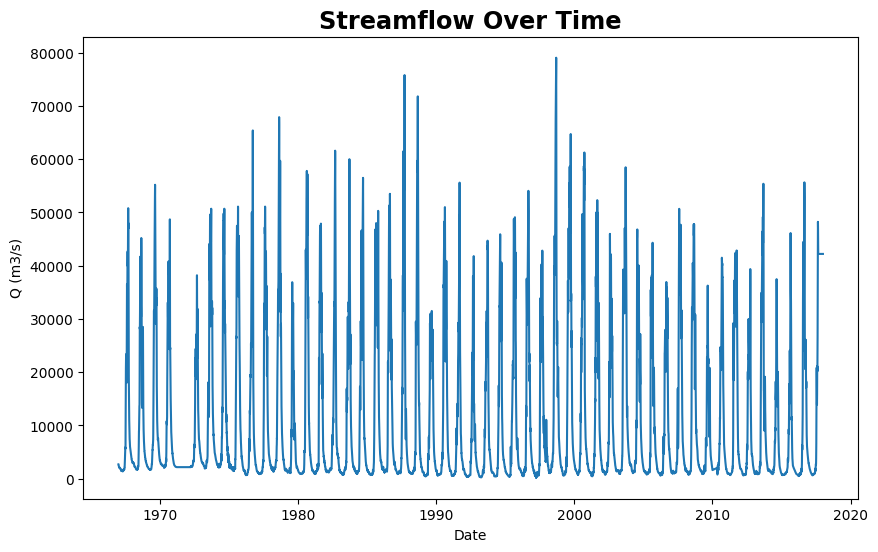

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

Root Mean Squared Error (RMSE): 13478.957577295472


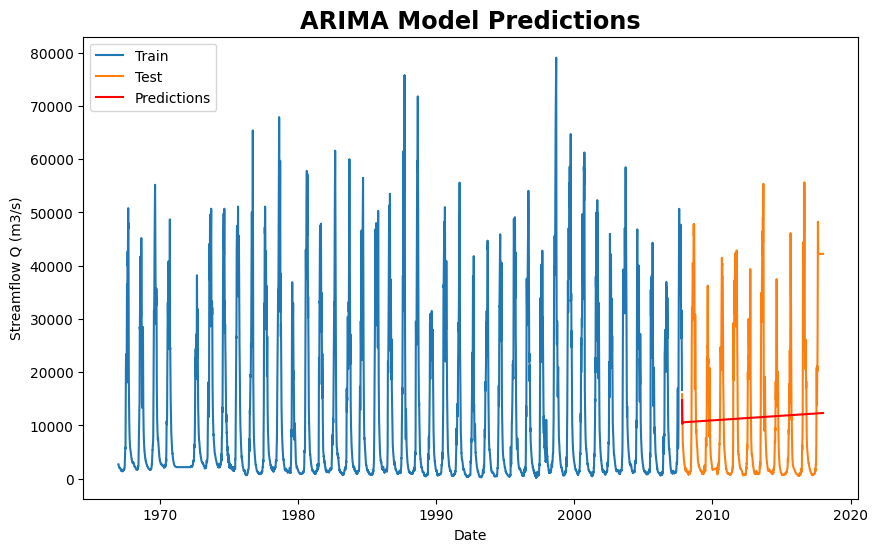

In [23]:

data = pd.read_csv('streamflow.csv')
# Create a date column by combining year, month, and day
data['Date'] = pd.to_datetime(data[['Year', 'Month', 'Day']])
data.set_index('Date', inplace=True)

# Forward fill
data['Q (m3/s)'].fillna(method='ffill', inplace=True)

# Visualize your time series data
plt.figure(figsize=(10, 6))
plt.plot(data['Q (m3/s)'])
plt.title('Streamflow Over Time')
plt.xlabel('Date')
plt.ylabel('Q (m3/s)')
plt.show()

# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train, test = data[0:train_size], data[train_size:]

# Define and fit the ARIMA model
model = ARIMA(train['Q (m3/s)'], order=(5, 2, 2))
model_fit = model.fit()

# Make predictions
predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')

# Evaluate the model
rmse = sqrt(mean_squared_error(test['Q (m3/s)'], predictions))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Visualize predictions
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['Q (m3/s)'], label='Train')
plt.plot(test.index, test['Q (m3/s)'], label='Test')
plt.plot(test.index, predictions, label='Predictions', color='red')
plt.title('ARIMA Model Predictions')
plt.xlabel('Date')
plt.ylabel('Streamflow Q (m3/s)')
plt.legend()
plt.show()


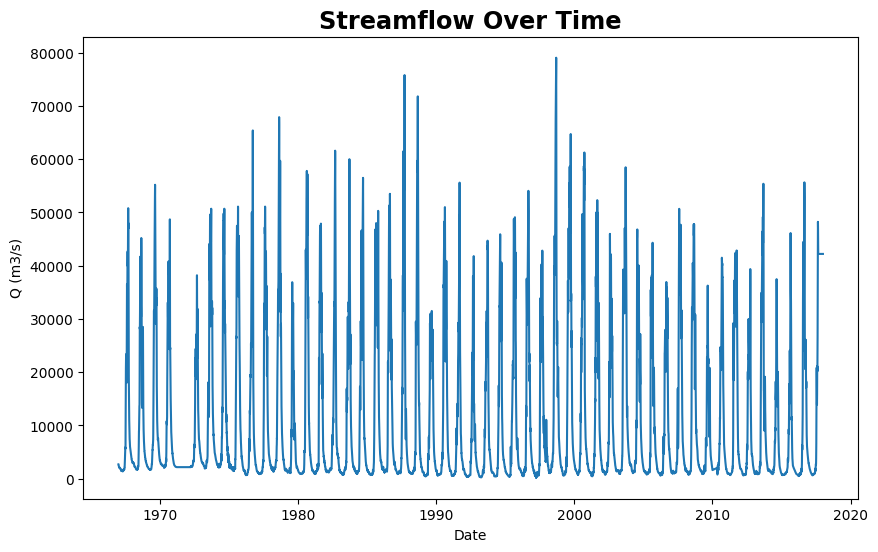

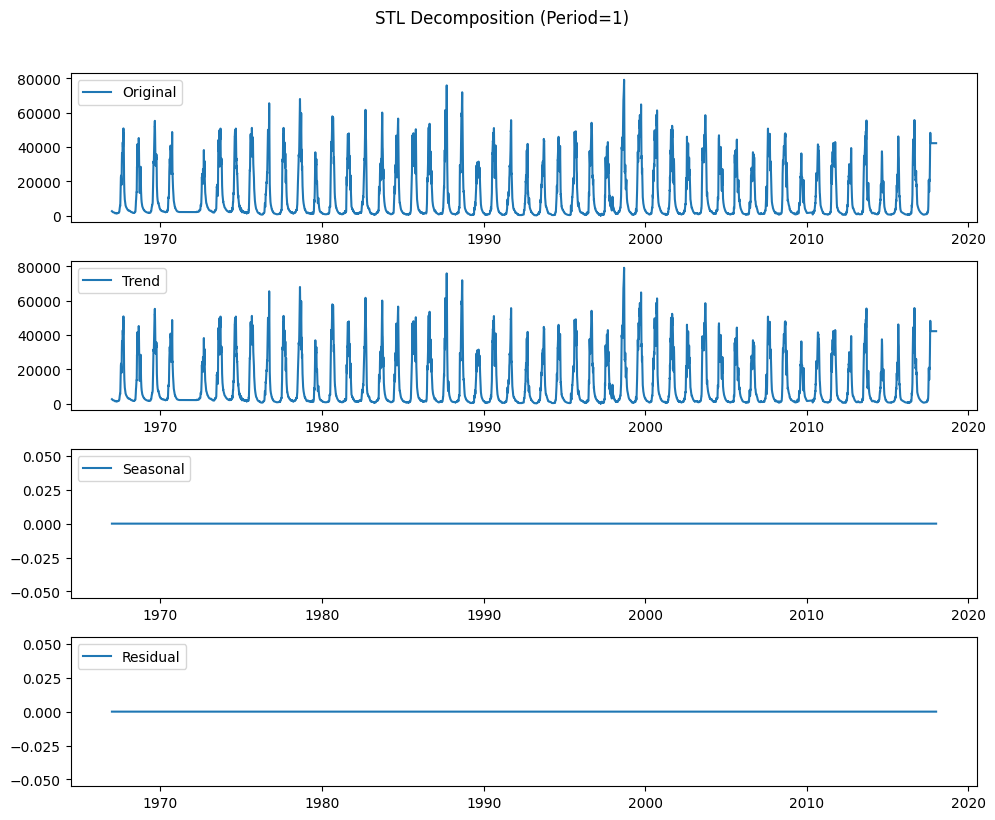

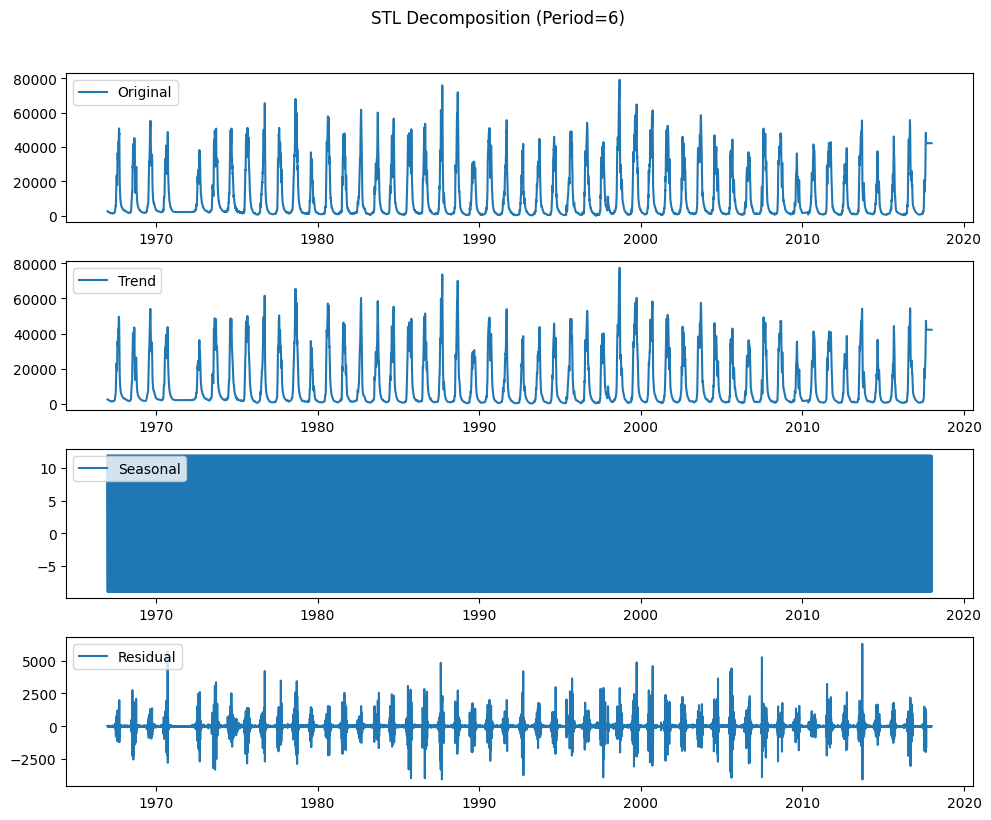

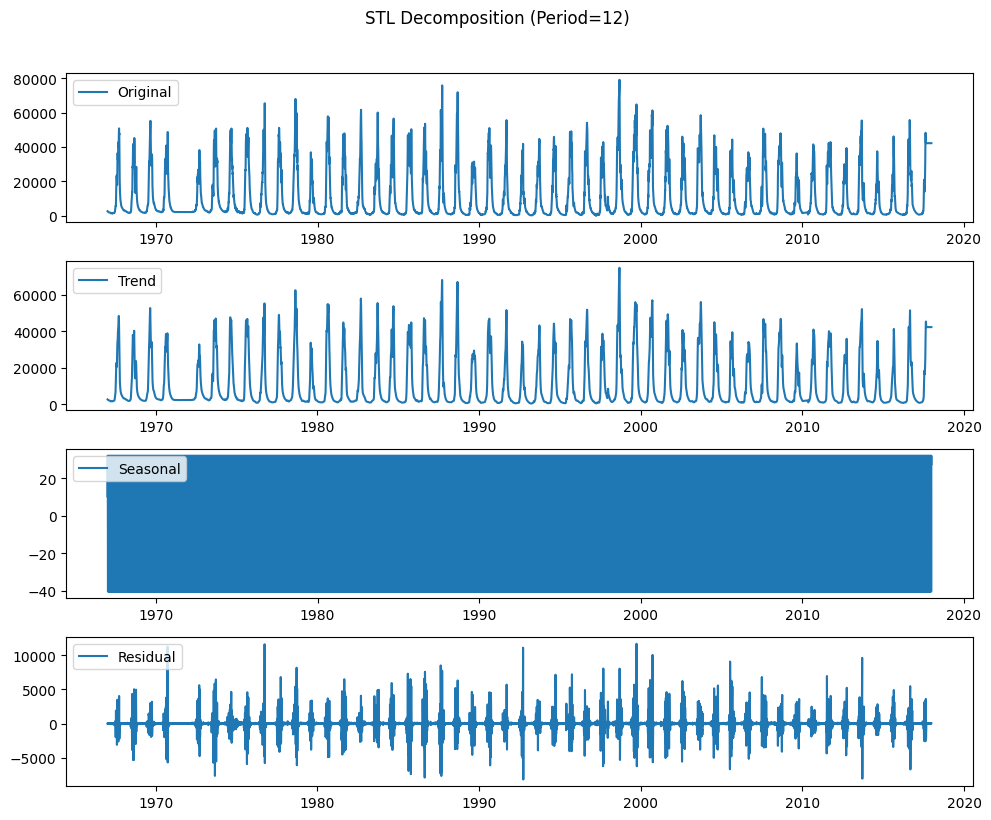

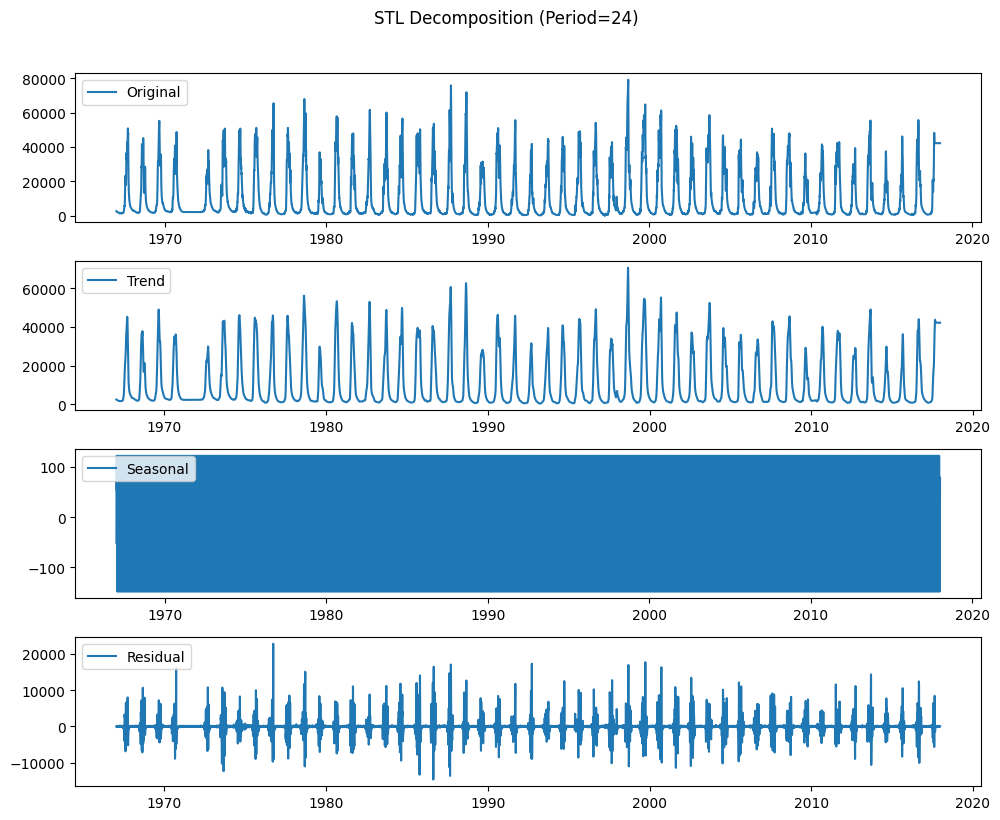

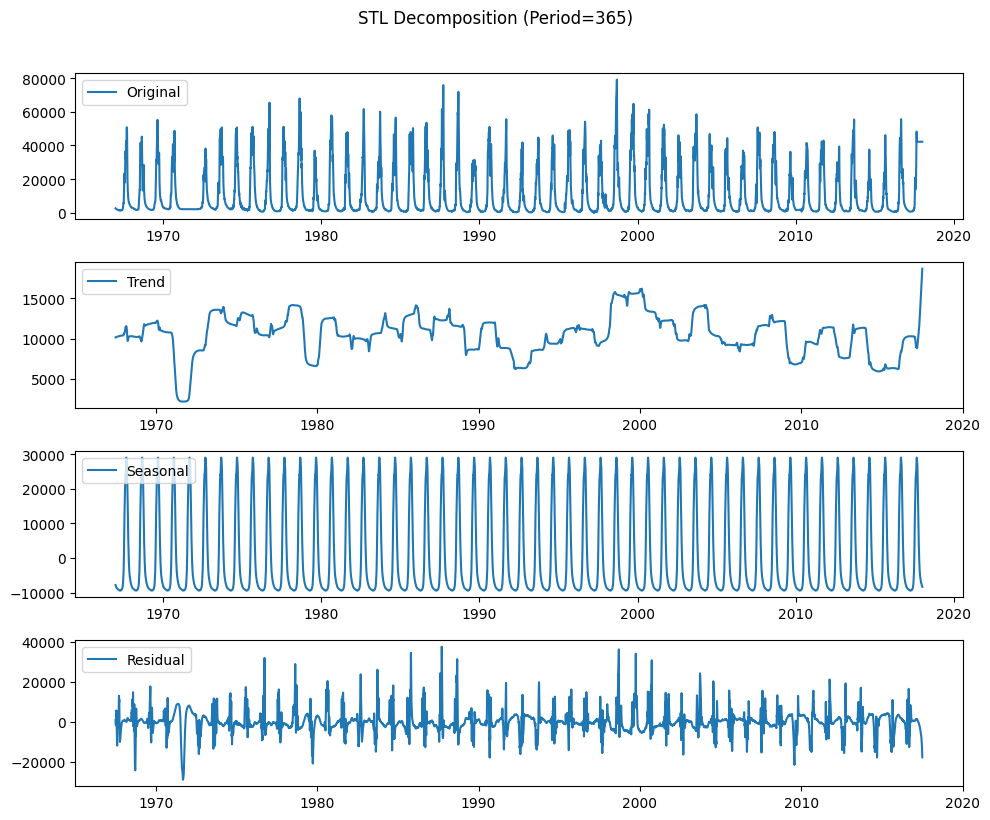

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

Root Mean Squared Error (RMSE): 13227.498035726809


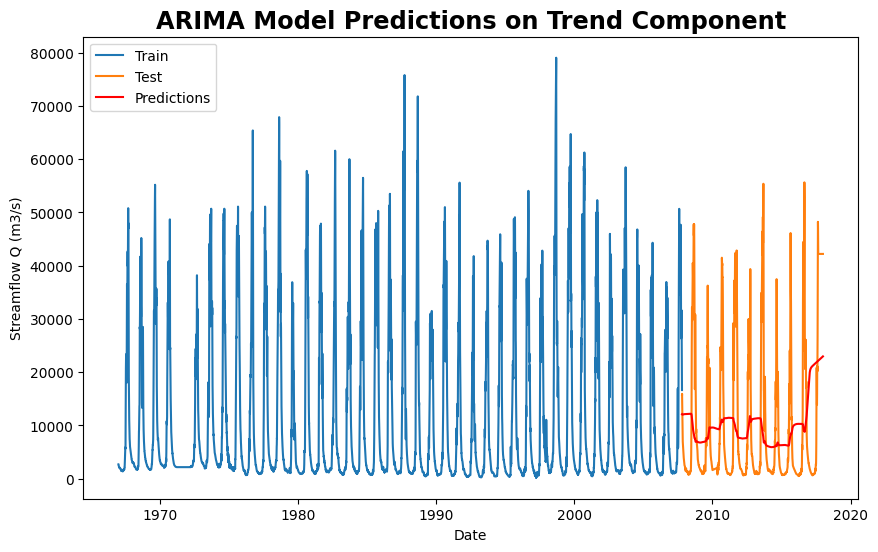

In [24]:

from statsmodels.tsa.seasonal import seasonal_decompose

data = pd.read_csv('streamflow.csv')

# Create a date column by combining year, month, and day
data['Date'] = pd.to_datetime(data[['Year', 'Month', 'Day']])
data.set_index('Date', inplace=True)

# Forward fill
data['Q (m3/s)'].fillna(method='ffill', inplace=True)

# Visualize
plt.figure(figsize=(10, 6))
plt.plot(data['Q (m3/s)'])
plt.title('Streamflow Over Time')
plt.xlabel('Date')
plt.ylabel('Q (m3/s)')
plt.show()

period_values = [1, 6, 12, 24, 365]  #Different period values

for period_value in period_values:
    result = seasonal_decompose(data['Q (m3/s)'], period=period_value)
    trend = result.trend
    seasonal = result.seasonal
    residual = result.resid

    # Visualize STL components
    plt.figure(figsize=(10, 8))
    plt.suptitle(f'STL Decomposition (Period={period_value})', y=1.02)

    plt.subplot(4, 1, 1)
    plt.plot(data['Q (m3/s)'], label='Original')
    plt.legend()

    plt.subplot(4, 1, 2)
    plt.plot(trend, label='Trend')
    plt.legend()

    plt.subplot(4, 1, 3)
    plt.plot(seasonal, label='Seasonal')
    plt.legend()

    plt.subplot(4, 1, 4)
    plt.plot(residual, label='Residual')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train, test = data[0:train_size], data[train_size:]

# ARIMA
model = ARIMA(trend.dropna(), order=(5, 2, 2))
model_fit = model.fit()

# Make predictions
predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')

# Evaluate
rmse = sqrt(mean_squared_error(test['Q (m3/s)'], predictions))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Visualize predictions
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['Q (m3/s)'], label='Train')
plt.plot(test.index, test['Q (m3/s)'], label='Test')
plt.plot(test.index, predictions, label='Predictions', color='red')
plt.title('ARIMA Model Predictions on Trend Component')
plt.xlabel('Date')
plt.ylabel('Streamflow Q (m3/s)')
plt.legend()
plt.show()


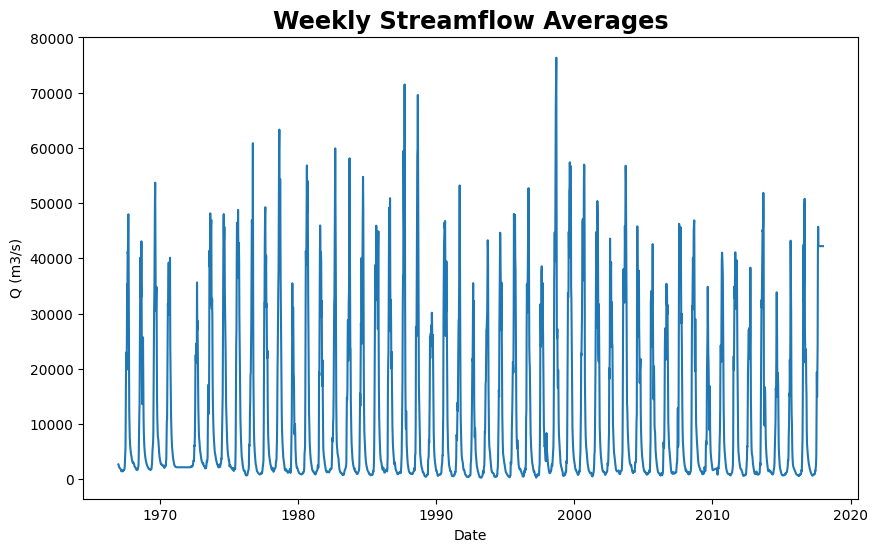

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


Root Mean Squared Error (RMSE): 20675.221908739153


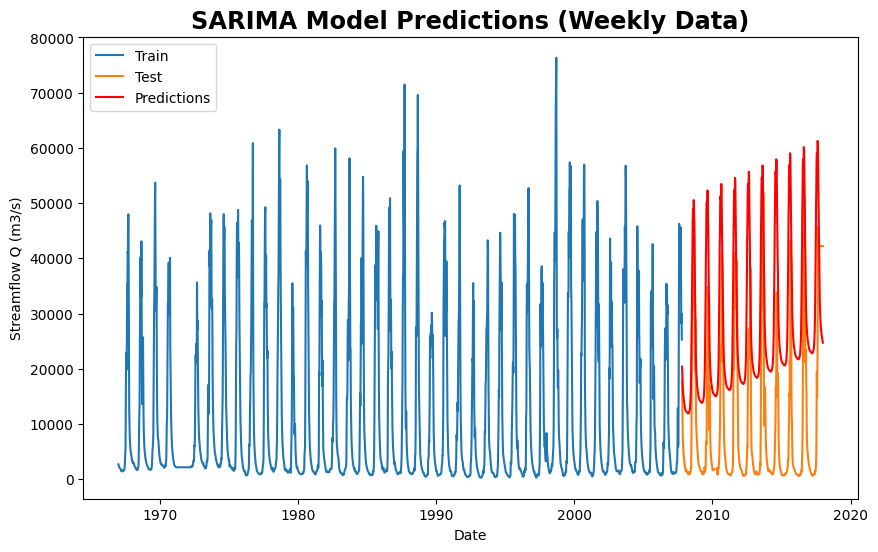

In [25]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from math import sqrt
data = pd.read_csv('streamflow.csv')

data['Date'] = pd.to_datetime(data[['Year', 'Month', 'Day']])
data.set_index('Date', inplace=True)
data.drop(['Year', 'Month', 'Day'], axis=1, inplace=True)

# Forward fill
data['Q (m3/s)'].fillna(method='ffill', inplace=True)

# Downsample to weekly averages
weekly_data = data.resample('W').mean()

# Visualize downsampled time series
plt.figure(figsize=(10, 6))
plt.plot(weekly_data['Q (m3/s)'])
plt.title('Weekly Streamflow Averages')
plt.xlabel('Date')
plt.ylabel('Q (m3/s)')
plt.show()

# Split the data into training and testing sets
train_size = int(len(weekly_data) * 0.8)
train, test = weekly_data[0:train_size], weekly_data[train_size:]

# Define and fit the SARIMA model
order = (1, 1, 1)  # ARIMA order
seasonal_order = (1, 1, 1, 52)  # Seasonal order with a period of 52 (weekly seasonality)
model = SARIMAX(train['Q (m3/s)'], order=order, seasonal_order=seasonal_order)
model_fit = model.fit()

# Make predictions
predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')

# Evaluate the model
rmse = sqrt(mean_squared_error(test['Q (m3/s)'], predictions))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Visualize predictions
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['Q (m3/s)'], label='Train')
plt.plot(test.index, test['Q (m3/s)'], label='Test')
plt.plot(test.index, predictions, label='Predictions', color='red')
plt.title('SARIMA Model Predictions (Weekly Data)')
plt.xlabel('Date')
plt.ylabel('Streamflow Q (m3/s)')
plt.legend()
plt.show()

